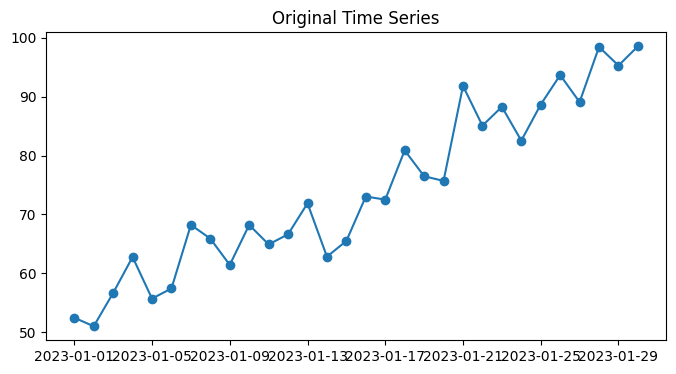


Stationarity Tests on Original Series:

Running Augmented Dickey-Fuller (ADF) Test...
ADF Statistic: 2.187935065896466
p-value: 0.9988724303748563
Critical Values: {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125}
ADF Test: Series is non-stationary.

Running KPSS Test...
KPSS Statistic: 0.8440655837008495
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS Test: Series is non-stationary.

Autocorrelation Plot of Original Series:


<ipython-input-2-2d253d1b0f8d>:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')


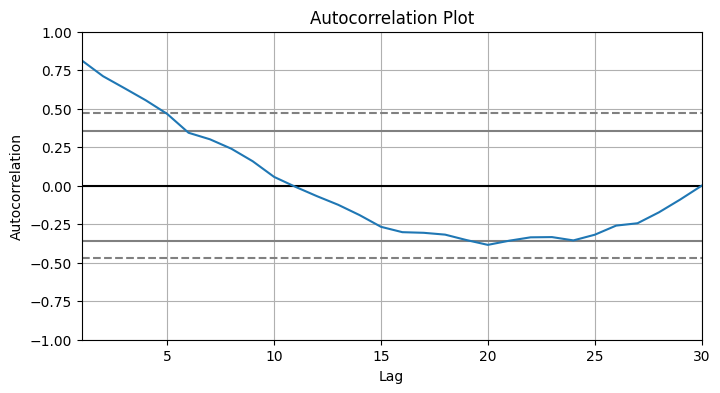

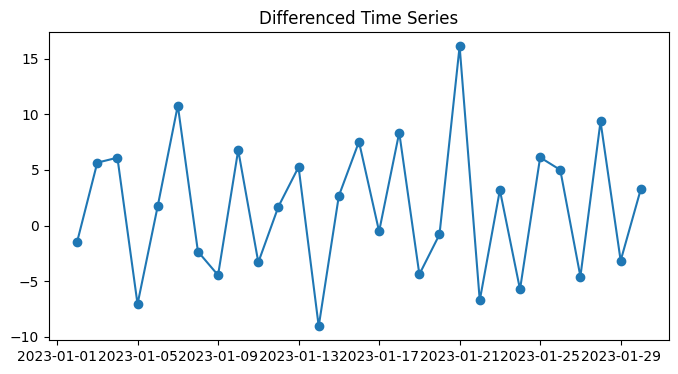


Stationarity Tests on Differenced Series:

Running Augmented Dickey-Fuller (ADF) Test...
ADF Statistic: -4.5498015477513505
p-value: 0.00015967300897446054
Critical Values: {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}
ADF Test: Series is stationary.

Running KPSS Test...
KPSS Statistic: 0.18937328270642445
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS Test: Series is stationary.

Autocorrelation Plot of Differenced Series:


<ipython-input-2-2d253d1b0f8d>:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')


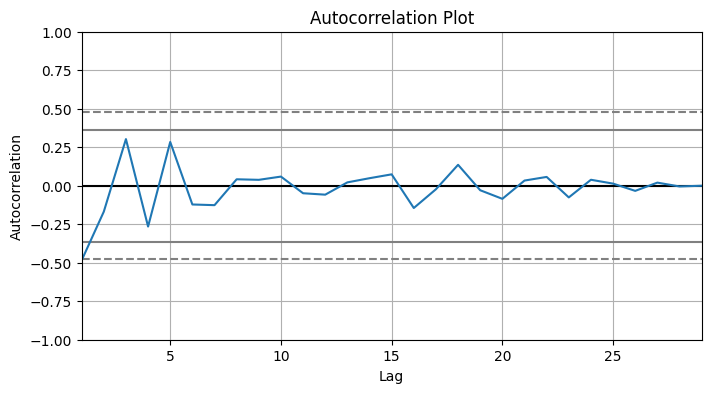

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from pandas.plotting import autocorrelation_plot

def generate_sample_data(n_points=30):
    """Generates a sample time series data with a trend."""
    np.random.seed(42)
    dates = pd.date_range(start='2023-01-01', periods=n_points, freq='D')
    trend = np.linspace(50, 100, n_points)  # Linear trend
    noise = np.random.normal(0, 5, n_points)  # Random noise
    values = trend + noise
    data = pd.DataFrame({'date': dates, 'value': values})
    data.set_index('date', inplace=True)
    return data

def test_stationarity(series):
    """Tests stationarity using ADF and KPSS tests."""
    print("\nRunning Augmented Dickey-Fuller (ADF) Test...")
    adf_result = adfuller(series)
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    print(f"Critical Values: {adf_result[4]}")
    if adf_result[1] < 0.05:
        print("ADF Test: Series is stationary.")
    else:
        print("ADF Test: Series is non-stationary.")

    print("\nRunning KPSS Test...")
    kpss_result = kpss(series, regression='c', nlags='auto')
    print(f"KPSS Statistic: {kpss_result[0]}")
    print(f"p-value: {kpss_result[1]}")
    print(f"Critical Values: {kpss_result[3]}")
    if kpss_result[1] < 0.05:
        print("KPSS Test: Series is non-stationary.")
    else:
        print("KPSS Test: Series is stationary.")

def plot_autocorrelation(data):
    """Plots the autocorrelation function."""
    plt.figure(figsize=(8, 4))
    autocorrelation_plot(data)
    plt.title('Autocorrelation Plot')
    plt.show()

def differencing(data):
    """Applies first-order differencing to make series stationary."""
    return data.diff().dropna()

def main():
    # Generate sample time series data
    data = generate_sample_data(n_points=30)

    # Plot original data
    plt.figure(figsize=(8, 4))
    plt.plot(data, marker='o', linestyle='-')
    plt.title('Original Time Series')
    plt.show()

    # Perform stationarity tests
    print("\nStationarity Tests on Original Series:")
    test_stationarity(data['value'])

    # Autocorrelation Plot
    print("\nAutocorrelation Plot of Original Series:")
    plot_autocorrelation(data['value'])

    # If the series is non-stationary, apply differencing
    data_diff = differencing(data['value'])

    # Plot differenced series
    plt.figure(figsize=(8, 4))
    plt.plot(data_diff, marker='o', linestyle='-')
    plt.title('Differenced Time Series')
    plt.show()

    # Perform stationarity tests on differenced series
    print("\nStationarity Tests on Differenced Series:")
    test_stationarity(data_diff)

    # Autocorrelation Plot for Differenced Series
    print("\nAutocorrelation Plot of Differenced Series:")
    plot_autocorrelation(data_diff)

if __name__ == '__main__':
    main()
